# Data-Enginering: Creating station tables
This notebook is dedicated to create a comprehensive station meta data from 2017 -> 2021 

### Steps:
1. Review Existing station table (2019->2021)
2. Review Most Recent official station table (2022)
3. Review stations that are not in the 2019 table. 
4. Compare contrast 3 tables and eliminate in-consistency, then join them into one 
5. (Optional) If 2017 table has info missing from the 2022 table, fetch geo-info from travel history data
6. Enginer closest neighbour hood ID as new column 
7. Enginer date-introduced as new column 
8. Enginer date-retired as new column (Nullable)

`Author:Ryan Liao`  
`Date:2022/05/11`

## Step 1-4

In [207]:
import numpy as np
import pandas as pd 
import tqdm
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

In [ ]:
df_station1921 = pd.read_csv('E:\Data\divvy/Divvy_stations_community.csv',index_col=0)
df_stationALL = pd.read_csv('E:\Data\divvy/Divvy_Bicycle_Stations_-_All_-_Map.csv')
df_ts_in_1721 = pd.read_csv('E:\Data\divvy/df_ts_in_1721_full.csv',index_col=0)

In [9]:
df_station1719 = pd.read_csv('E:\Data\divvy/1719station_id_name.csv')   

In [2]:
df_triphist1721 = pd.read_csv('E:\Data\divvy/Divvy_Trips_1719.csv')

C:\Users\18066\AppData\Local\Temp\ipykernel_39984\93250638.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_triphist1721 = pd.read_csv('E:\Data\divvy/Divvy_Trips_1719.csv')


In [10]:
df_station1719

,to_station_id,to_station_name,trip_id
0,1,Special Events,1
1,2,Buckingham Fountain,27417
2,2,Buckingham Fountain (Temp),4356
3,3,Shedd Aquarium,72085
4,4,Burnham Harbor,45642
...,...,...,...
683,666,Cherry Ave & Blackhawk St,582
684,669,LBS - BBB La Magie,1
685,671,HUBBARD ST BIKE CHECKING (LBS-WH-TEST),157
686,672,Franklin St & Illinois St,3813


In [6]:
df_station1921.head()

,station_id,lng,lat,cord,station_name,Nbh_id,com_id,Docks in Service
0,2,-87.620527,41.876503,"(-87.62052684219132, 41.87650284189418)",Buckingham Fountain,32.0,32,39.0
1,3,-87.615373,41.867215,"(-87.61537258521274, 41.86721537439574)",Shedd Aquarium,33.3,33,55.0
2,4,-87.613335,41.856277,"(-87.61333539799435, 41.85627738078977)",Burnham Harbor,33.3,33,23.0
3,5,-87.627707,41.874066,"(-87.62770717196332, 41.874066196819705)",State St & Harrison St,32.2,32,23.0
4,6,-87.612807,41.886985,"(-87.61280661461953, 41.886984755969536)",Dusable Harbor,32.1,32,39.0


In [8]:
df_stationALL.head()

,ID,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,763,Morgan St & Lake St*,20,20,In Service,41.885492,-87.652289,"(41.88549170626906, -87.65228927135468)"
1,1594046383808271024,Troy St & Jackson Blvd,9,9,In Service,41.877505,-87.704850,"(41.877505, -87.70485)"
2,644,Western Ave & Fillmore St,11,11,In Service,41.868563,-87.686234,"(41.868563, -87.686234)"
3,255,Indiana Ave & Roosevelt Rd,39,39,In Service,41.867888,-87.623041,"(41.867888, -87.623041)"
4,684,Prospect Sq & 91st St,15,15,In Service,41.728234,-87.667524,"(41.7282338, -87.6675239)"


In [17]:
df_station1921.dtypes

station_id           object
lng                 float64
lat                 float64
cord                 object
station_name         object
Nbh_id              float64
com_id                int64
Docks in Service    float64
dtype: object

In [18]:
df_stationALL.dtypes

ID                   object
Station Name         object
Total Docks           int64
Docks in Service      int64
Status               object
Latitude            float64
Longitude           float64
Location             object
dtype: object

In [15]:
df_stationALL.ID = df_stationALL.ID.apply(lambda x:str(x))

In [35]:
df_station_joined_name = df_station1921.rename({'station_name':'Station Name'},axis=1).\
    merge(df_stationALL,on = 'Station Name', how = 'outer')

In [34]:
df_station_joined_ID = df_station1921.rename({'station_id':'ID'},axis=1).\
    merge(df_stationALL,on = 'ID', how = 'outer')

In [38]:
df_station_joined_ID[df_station_joined_ID['station_name'] != df_station_joined_ID['Station Name']]

,ID,lng,lat,cord,station_name,Nbh_id,com_id,Docks in Service_x,Station Name,Total Docks,Docks in Service_y,Status,Latitude,Longitude,Location
15,19,-87.659119,41.868968,"(-87.65911863256633, 41.8689683262552)",Throop (Loomis) St & Taylor St,28.0,28.0,15.0,Throop St & Taylor St,15.0,15.0,In Service,41.868968,-87.659141,"(41.868968, -87.659141)"
18,20,-87.653110,41.910519,"(-87.65311046917232, 41.91051851673848)",Damen Ave & Wabansia Ave,7.3,7.0,15.0,Sheffield Ave & Kingsbury St,15.0,15.0,In Service,41.910522,-87.653106,"(41.910522, -87.653106)"
24,26,-87.617565,41.890399,"(-87.6175647137488, 41.890398722845354)",McClurg Ct & Illinois St,8.7,8.0,31.0,New St & Illinois St,31.0,31.0,In Service,41.890847,-87.618617,"(41.890847040623804, -87.61861681938171)"
30,31,-87.635695,41.896730,"(-87.6356952115502, 41.89672972637583)",Franklin St & Chicago Ave (Temp),8.6,8.0,23.0,Franklin St & Chicago Ave,23.0,23.0,In Service,41.896747,-87.635668,"(41.896746973093805, -87.63566762208939)"
58,58,-87.668903,41.916008,"(-87.66890260895397, 41.916007889103454)",Marshfield Ave & Cortland St,24.8,24.0,23.0,Elston Ave & Cortland St,23.0,23.0,In Service,41.916433,-87.666746,"(41.91643342912655, -87.66674637794495)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Doty Ave & 111th St,15.0,15.0,In Service,41.695010,-87.598715,"(41.69501044938143, -87.59871482849121)"
1960,748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Olive Harvey College,15.0,15.0,In Service,41.709581,-87.590234,"(41.70958113526255, -87.59023368358612)"
1961,760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lakefront Trail & Bryn Mawr Ave,19.0,19.0,In Service,41.984044,-87.652281,"(41.98404411519213, -87.65228122472763)"
1962,753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,State St & Chicago Ave,15.0,15.0,In Service,41.896617,-87.628579,"(41.89661720040753, -87.62857854366302)"


In [36]:
df_station_joined_name.head()

,station_id,lng,lat,cord,Station Name,Nbh_id,com_id,Docks in Service_x,ID,Total Docks,Docks in Service_y,Status,Latitude,Longitude,Location
0,2,-87.620527,41.876503,"(-87.62052684219132, 41.87650284189418)",Buckingham Fountain,32.0,32.0,39.0,2,39.0,39.0,In Service,41.876535,-87.620473,"(41.8765351944122, -87.62047290802002)"
1,15541,-87.620910,41.875708,"(-87.62090982256507, 41.87570813111998)",Buckingham Fountain,32.0,32.0,15.0,2,39.0,39.0,In Service,41.876535,-87.620473,"(41.8765351944122, -87.62047290802002)"
2,3,-87.615373,41.867215,"(-87.61537258521274, 41.86721537439574)",Shedd Aquarium,33.3,33.0,55.0,3,55.0,55.0,In Service,41.867226,-87.615355,"(41.86722595682, -87.6153553902)"
3,15544,-87.615359,41.867235,"(-87.61535936572302, 41.86723489605851)",Shedd Aquarium,33.3,33.0,15.0,3,55.0,55.0,In Service,41.867226,-87.615355,"(41.86722595682, -87.6153553902)"
4,4,-87.613335,41.856277,"(-87.61333539799435, 41.85627738078977)",Burnham Harbor,33.3,33.0,23.0,4,23.0,23.0,In Service,41.857412,-87.613792,"(41.85741178707404, -87.61379152536392)"


In [37]:
df_station_joined_name[df_station_joined_name['station_id'] != df_station_joined_name['ID']]

,station_id,lng,lat,cord,Station Name,Nbh_id,com_id,Docks in Service_x,ID,Total Docks,Docks in Service_y,Status,Latitude,Longitude,Location
1,15541,-87.620910,41.875708,"(-87.62090982256507, 41.87570813111998)",Buckingham Fountain,32.0,32.0,15.0,2,39.0,39.0,In Service,41.876535,-87.620473,"(41.8765351944122, -87.62047290802002)"
3,15544,-87.615359,41.867235,"(-87.61535936572302, 41.86723489605851)",Shedd Aquarium,33.3,33.0,15.0,3,55.0,55.0,In Service,41.867226,-87.615355,"(41.86722595682, -87.6153553902)"
5,15545,-87.613343,41.856271,"(-87.61334338160954, 41.856270798983026)",Burnham Harbor,33.3,33.0,15.0,4,23.0,23.0,In Service,41.857412,-87.613792,"(41.85741178707404, -87.61379152536392)"
7,SL-007,-87.627708,41.874037,"(-87.62770750869136, 41.87403716987216)",State St & Harrison St,32.2,32.0,11.0,5,23.0,23.0,In Service,41.874053,-87.627716,"(41.874053, -87.627716)"
9,KA1503000064,-87.612810,41.886975,"(-87.61280990619292, 41.88697496966285)",Dusable Harbor,32.1,32.0,11.0,6,39.0,39.0,In Service,41.886976,-87.612813,"(41.886976, -87.612813)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,NaN,NaN,NaN,NaN,Burnham Greenway & 112th St,NaN,NaN,NaN,749,15.0,10.0,In Service,41.691774,-87.530431,"(41.69177385116831, -87.53043115139008)"
1856,NaN,NaN,NaN,NaN,Doty Ave & 111th St,NaN,NaN,NaN,742,15.0,15.0,In Service,41.695010,-87.598715,"(41.69501044938143, -87.59871482849121)"
1857,NaN,NaN,NaN,NaN,Olive Harvey College,NaN,NaN,NaN,748,15.0,15.0,In Service,41.709581,-87.590234,"(41.70958113526255, -87.59023368358612)"
1858,NaN,NaN,NaN,NaN,McClurg Ct & Ohio St,NaN,NaN,NaN,99,19.0,19.0,In Service,41.892592,-87.617289,"(41.892592119709725, -87.61728912591934)"


In [16]:
df_station_1721_retired = pd.DataFrame(set(df_ts_in_1721.columns).difference(set(df_station1921.station_name))).\
    merge(df_station1719,left_on=0,right_on='to_station_name',how='left')[['to_station_id',	'to_station_name',	'trip_id']]

In [24]:
df_station_1721_retired = df_station_1721_retired.dropna()
df_station_1721_retired.to_station_id = df_station_1721_retired.to_station_id.apply(lambda x: int(x))

In [26]:
df_station_1721_retired.head()

,to_station_id,to_station_name,trip_id
0,23,Orleans St & Elm St (*),10810.0
1,616,Oak Park Ave & Harrison St,365.0
2,17,Wood St & Division St,3074.0
3,421,MLK Jr Dr & 56th St (*),515.0
4,321,Wabash Ave & 8th St,4433.0


In [31]:
df_station_1721_retired_merged = df_station_1721_retired.merge(df_stationALL,left_on='to_station_id',right_on='ID',how='left')

In [35]:
df_station_1721_retired_merged[df_station_1721_retired_merged.Status.isna()]

,to_station_id,to_station_name,trip_id,ID,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
1,616,Oak Park Ave & Harrison St,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,609,Forest Ave & Lake St,569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,612,Ridgeland Ave & Lake St,455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,613,Wisconsin Ave & Madison St,445.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,363,TS ~ DIVVY PARTS TESTING,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,610,Marion St & South Blvd,792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,611,Oak Park Ave & South Blvd,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,669,LBS - BBB La Magie,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,512,BBB ~ Divvy Parts Testing,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1,Special Events,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_station1921.head()

,station_id,lng,lat,cord,station_name,Nbh_id,com_id,Docks in Service
0,2,-87.620527,41.876503,"(-87.62052684219132, 41.87650284189418)",Buckingham Fountain,32.0,32,39.0
1,3,-87.615373,41.867215,"(-87.61537258521274, 41.86721537439574)",Shedd Aquarium,33.3,33,55.0
2,4,-87.613335,41.856277,"(-87.61333539799435, 41.85627738078977)",Burnham Harbor,33.3,33,23.0
3,5,-87.627707,41.874066,"(-87.62770717196332, 41.874066196819705)",State St & Harrison St,32.2,32,23.0
4,6,-87.612807,41.886985,"(-87.61280661461953, 41.886984755969536)",Dusable Harbor,32.1,32,39.0


In [37]:
df_station_1721_retired_merged.head()

,to_station_id,to_station_name,trip_id,ID,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,23,Orleans St & Elm St (*),10810.0,23.0,Orleans St & Elm St,15.0,15.0,In Service,41.902924,-87.637715,"(41.902924, -87.637715)"
1,616,Oak Park Ave & Harrison St,365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,Wood St & Division St,3074.0,17.0,Honore St & Division St,23.0,23.0,In Service,41.903119,-87.673935,"(41.903119, -87.673935)"
3,421,MLK Jr Dr & 56th St (*),515.0,421.0,MLK Jr Dr & 56th St,11.0,11.0,In Service,41.793429,-87.615853,"(41.79342945658, -87.6158532619)"
4,321,Wabash Ave & 8th St,4433.0,321.0,Wabash Ave & 9th St,19.0,19.0,In Service,41.870769,-87.625734,"(41.870769, -87.625734)"


In [51]:
df_station_1721_retired_merged_ready = df_station_1721_retired_merged[['to_station_id','Longitude','Latitude','to_station_name','Docks in Service']].\
    rename({'to_station_id':'station_id','Longitude':'lng','Latitude':'lat','to_station_name':'station_name'},axis=1)

In [52]:
df_station_1721_retired_merged_ready

,station_id,lng,lat,station_name,Docks in Service
0,23,-87.637715,41.902924,Orleans St & Elm St (*),15.0
1,616,NaN,NaN,Oak Park Ave & Harrison St,NaN
2,17,-87.673935,41.903119,Wood St & Division St,23.0
3,421,-87.615853,41.793429,MLK Jr Dr & 56th St (*),11.0
4,321,-87.625734,41.870769,Wabash Ave & 8th St,19.0
...,...,...,...,...,...
67,607,NaN,NaN,Cuyler Ave & Augusta St,NaN
68,613,NaN,NaN,Wisconsin Ave & Madison St (Temp),NaN
69,120,-87.631931,41.853085,Wentworth Ave & Archer Ave,19.0
70,217,-87.658040,41.886616,Racine Ave (May St) & Fulton St,15.0


In [56]:
df_station1921_ready = df_station1921.drop(columns=['Nbh_id','com_id','cord'])

In [57]:
df_station_1721 = pd.concat([df_station_1721_retired_merged_ready,df_station1921_ready])

In [58]:
df_station_1721

,station_id,lng,lat,station_name,Docks in Service
0,23,-87.637715,41.902924,Orleans St & Elm St (*),15.0
1,616,NaN,NaN,Oak Park Ave & Harrison St,NaN
2,17,-87.673935,41.903119,Wood St & Division St,23.0
3,421,-87.615853,41.793429,MLK Jr Dr & 56th St (*),11.0
4,321,-87.625734,41.870769,Wabash Ave & 8th St,19.0
...,...,...,...,...,...
1356,TA1309000066,-87.674237,41.969098,Ravenswood Ave & Lawrence Ave,11.0
1357,TA1309000067,-87.606615,41.803032,Cottage Grove Ave & 51st St,11.0
1358,WL-008,-87.641080,41.867119,Clinton St & Roosevelt Rd,11.0
1359,WL-011,-87.642739,41.880403,Jefferson St & Monroe St,11.0


In [41]:
#Insertting Nbh_id	com_id
df_community = pd.read_csv('E:\Data\divvy/chicago_community_new.csv',index_col=0)

In [42]:
df_community.head()

,neighborhood_name,neighborhood_number,community_name,community_area_id,lat,lng
0,Rogers Park,1.0,Rogers Park,1,42.012629,-87.674588
1,Loyola,1.1,Rogers Park,1,41.998948,-87.658259
2,West Ridge,2.0,West Ridge,2,42.000580,-87.692577
3,Arcadia Terrace,2.1,West Ridge,2,41.986850,-87.694398
4,Nortown,2.2,West Ridge,2,41.998367,-87.763145


In [43]:
#Calculate distance given one cord:
def get_closest_nbg_id(cord1):
    cord1 = np.array(cord1)
    dist = np.sum((df_community[['lat','lng']] - cord1)**2,axis =1)**0.5
    return float(df_community.iloc[dist.argmin()].neighborhood_number)

In [72]:
Nbh_ids = []
for idx_st,row_st in tqdm.tqdm(df_station_1721.iterrows()):
    if np.isnan(row_st['lat']) :
        print(row_st)
        Nbh_ids.append(None)
    else:
        cord = float(row_st['lat']), float(row_st['lng'])
        id = str(get_closest_nbg_id(cord))
        Nbh_ids.append(id)

260it [00:00, 1102.49it/s]

station_id                                 616
lng                                        NaN
lat                                        NaN
station_name        Oak Park Ave & Harrison St
Docks in Service                           NaN
Nbh_id                                     1.0
com_id                                       1
Name: 1, dtype: object
station_id                           609
lng                                  NaN
lat                                  NaN
station_name        Forest Ave & Lake St
Docks in Service                     NaN
Nbh_id                               1.0
com_id                                 1
Name: 6, dtype: object
station_id                              612
lng                                     NaN
lat                                     NaN
station_name        Ridgeland Ave & Lake St
Docks in Service                        NaN
Nbh_id                                  1.0
com_id                                    1
Name: 7, dtype: object
station

1433it [00:01, 1192.56it/s]


In [76]:
df_station_1721['Nbh_id'] = Nbh_ids
df_station_1721['com_id'] = df_station_1721['Nbh_id'].apply(lambda x:x.split('.')[0] if x is not None else None)

In [79]:
df_station_1721.to_csv('E:\Data\divvy/df_station_1721.csv')

### Step 7,8

In [153]:
def Get_start_end(station_name,df_ts):
    temp = df_ts[station_name].reset_index()
    temp.insert(0,'date',temp.time_stamp.apply(lambda x:x.split(' ')[0]))
    daily_vol = temp.groupby('date').sum()
    #Identifying date of start (first non zero value)
    begin = daily_vol[daily_vol[station_name] != 0].index[0]
    #Identifying date of retirement (last non zero value + 1)
    end_ = daily_vol[daily_vol[station_name] != 0].index[-1]
    end = str((datetime.strptime(end_,'%Y-%m-%d') + timedelta(days=1)).date())
    return (begin,end)

<AxesSubplot:xlabel='time_stamp'>

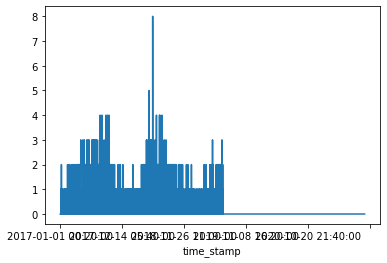

In [154]:
station_name = 'Halsted St & 35th St (*)'
df_ts_in_1721[station_name].plot()

In [155]:
Get_start_end(station_name,df_ts_in_1721)

('2017-01-03', '2019-07-01')

In [140]:
df_station_1721.insert(len(df_station_1721.columns),'date_begin',None)
df_station_1721.insert(len(df_station_1721.columns),'date_end',None)

In [156]:
df_station_1721_temp = df_station_1721.set_index('station_name')

In [157]:
STARTS = []
ENDS = []
for station_name in tqdm.tqdm(df_ts_in_1721.columns):
    start,end = Get_start_end(station_name,df_ts_in_1721)
    df_station_1721_temp.at[station_name,'date_begin'] = start 
    df_station_1721_temp.at[station_name,'date_end'] = end 

100%|██████████| 845/845 [01:23<00:00, 10.11it/s]


In [163]:
df_station_1721_temp.date_end.value_counts()

2021-09-01    1030
2021-09-02     104
2021-08-31      72
2021-08-30      33
2019-07-01      19
              ... 
2020-10-02       1
2019-06-30       1
2020-10-18       1
2019-06-18       1
2021-07-08       1
Name: date_end, Length: 84, dtype: int64

<AxesSubplot:>

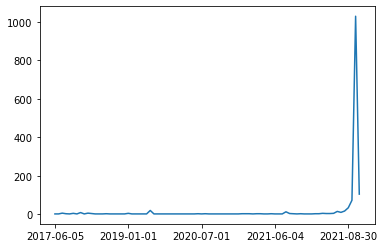

In [162]:
df_station_1721_temp.date_end.value_counts().sort_index().plot()

In [170]:
df_station_1721_temp.date_end.value_counts()

2021-09-01    1030
2021-09-02     104
2021-08-31      72
2021-08-30      33
2019-07-01      19
              ... 
2020-10-02       1
2019-06-30       1
2020-10-18       1
2019-06-18       1
2021-07-08       1
Name: date_end, Length: 84, dtype: int64

In [173]:
df_station_1721_temp.shape

(1434, 8)

In [181]:
df_station_1721_temp = df_station_1721_temp.reset_index()

In [185]:
df_station_1721_noID = df_station_1721_temp.drop(columns='station_id',axis=1)

In [200]:
df_station_1721_noID_clean = df_station_1721_noID.groupby('station_name').mean().\
    join(df_station_1721_noID[['station_name','Nbh_id','com_id','date_begin','date_end']].set_index('station_name'),
         how='left').drop_duplicates()

In [202]:
df_station_1721_noID_clean = df_station_1721_noID_clean.reset_index()

### Final Verification

  0%|          | 0/10 [00:00<?, ?it/s]

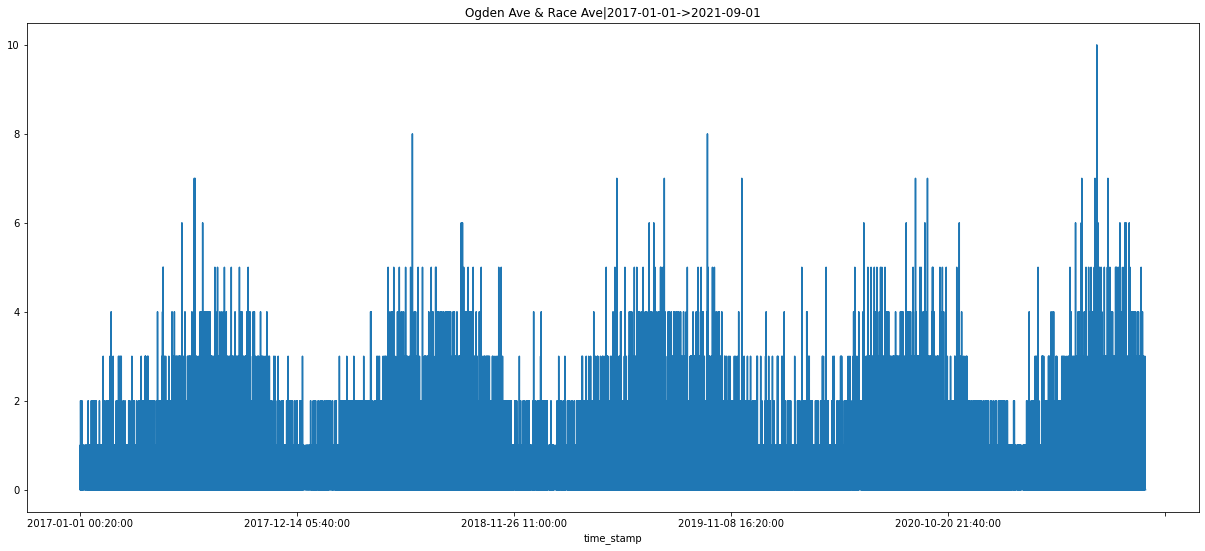

 10%|█         | 1/10 [00:00<00:02,  4.38it/s]

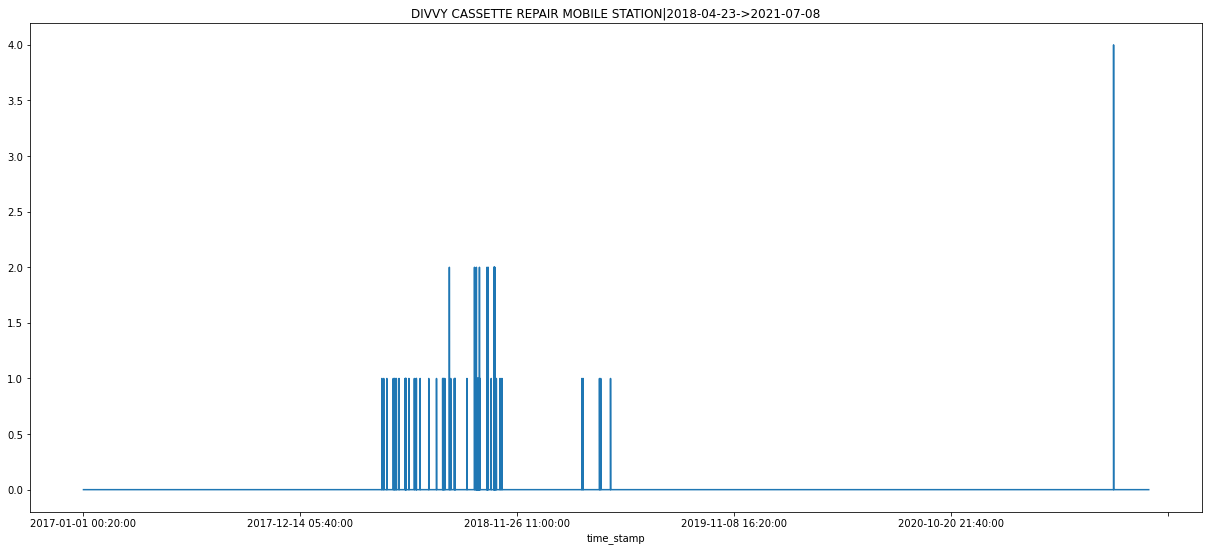

 20%|██        | 2/10 [00:00<00:01,  5.71it/s]

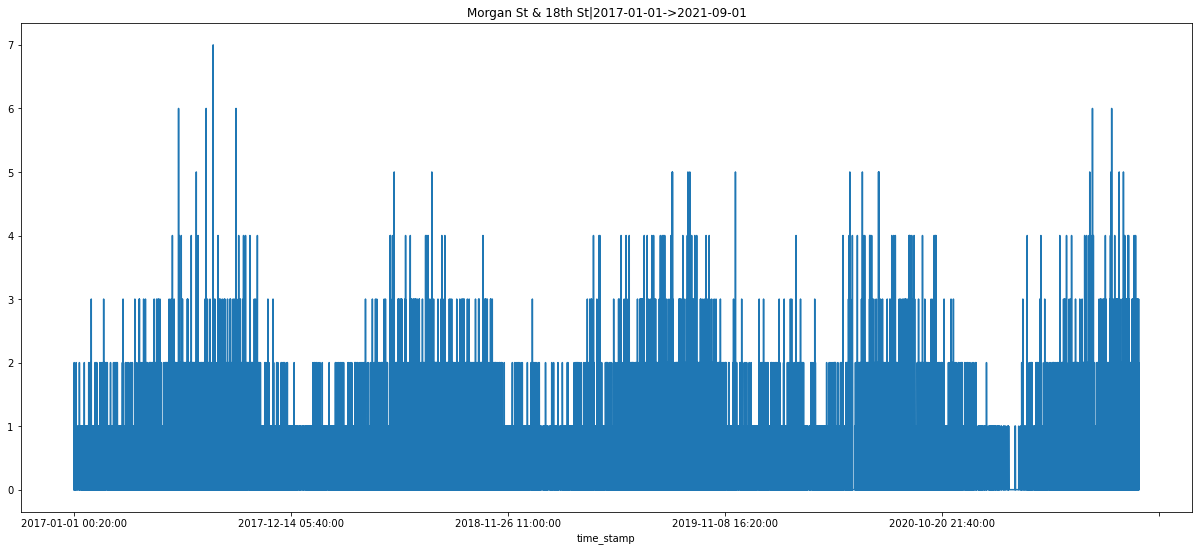

 30%|███       | 3/10 [00:00<00:01,  5.00it/s]

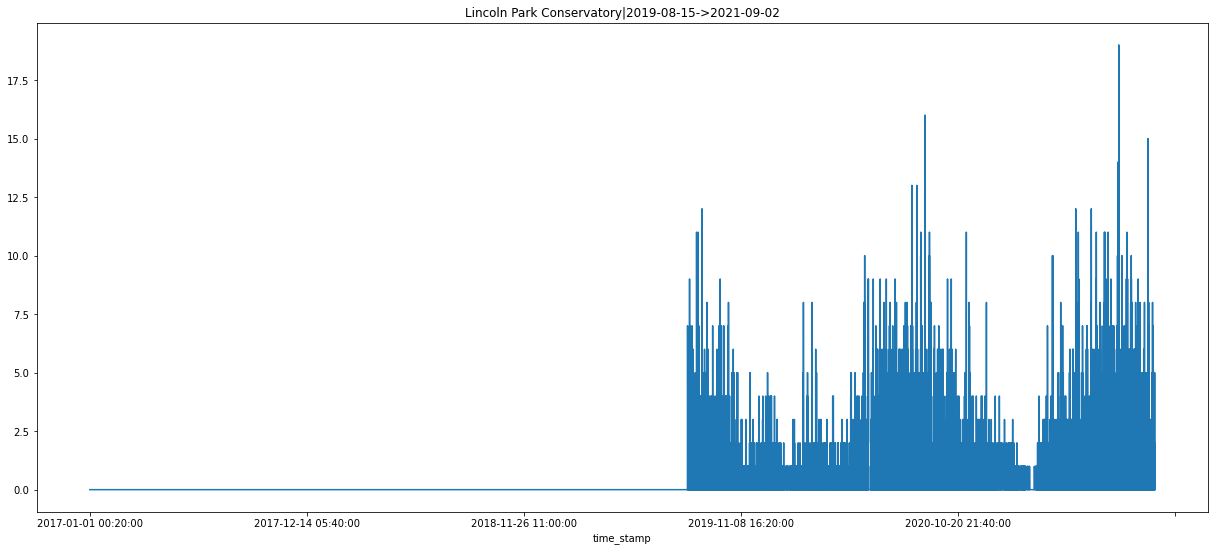

 40%|████      | 4/10 [00:00<00:01,  5.39it/s]

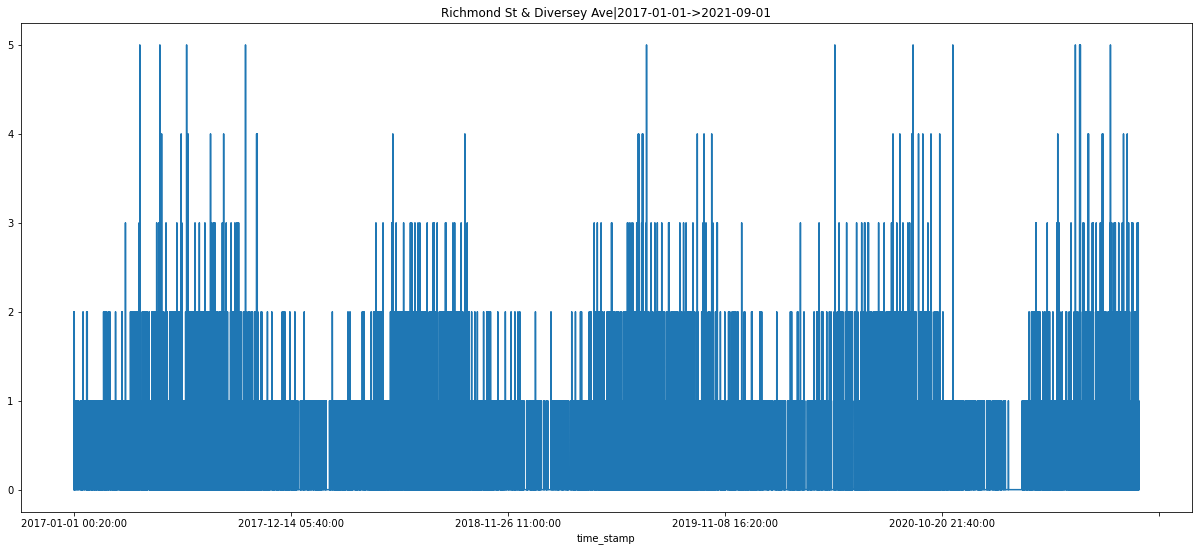

 50%|█████     | 5/10 [00:00<00:00,  5.04it/s]

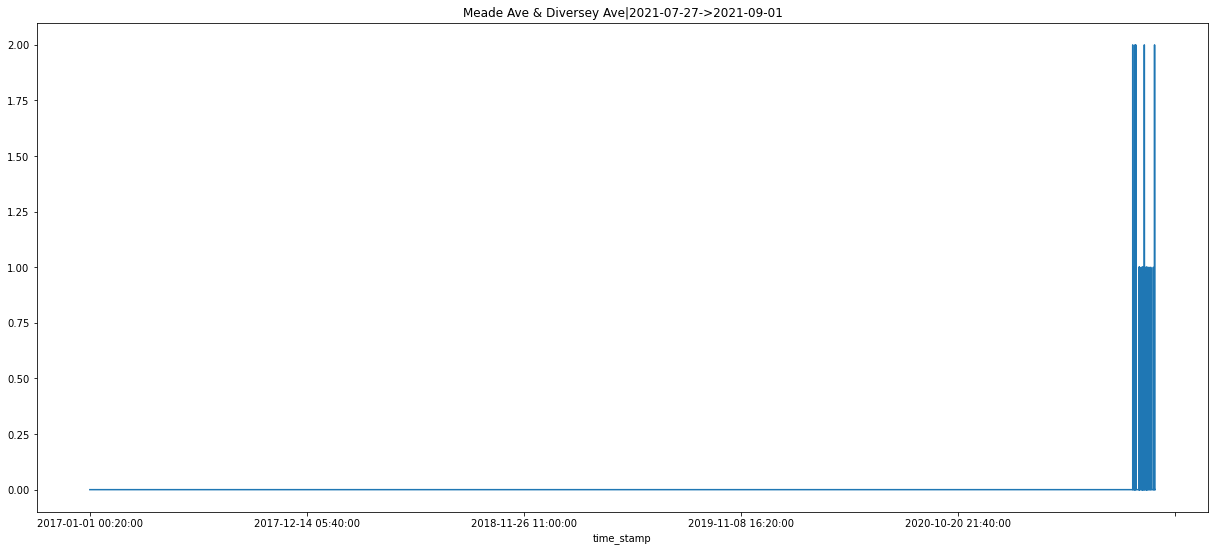

 60%|██████    | 6/10 [00:01<00:00,  5.60it/s]

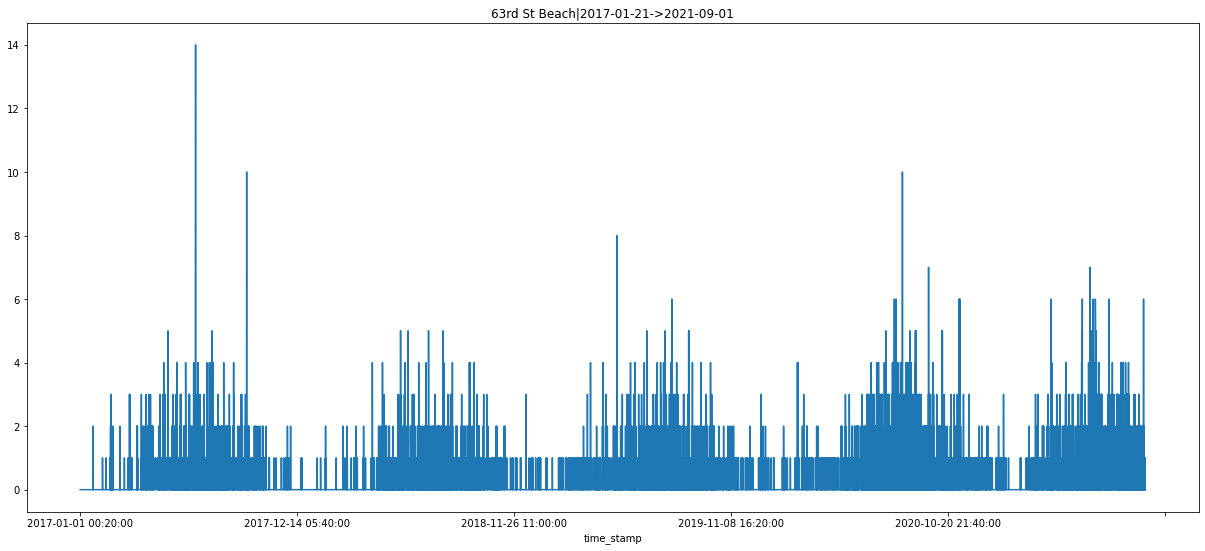

 70%|███████   | 7/10 [00:01<00:00,  5.51it/s]

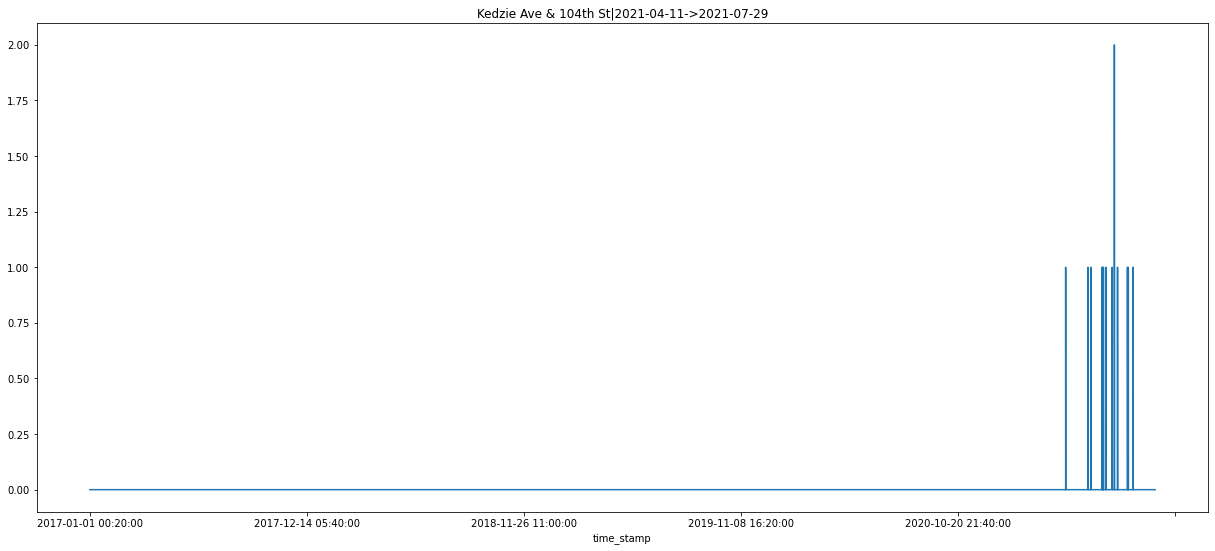

 80%|████████  | 8/10 [00:01<00:00,  5.89it/s]

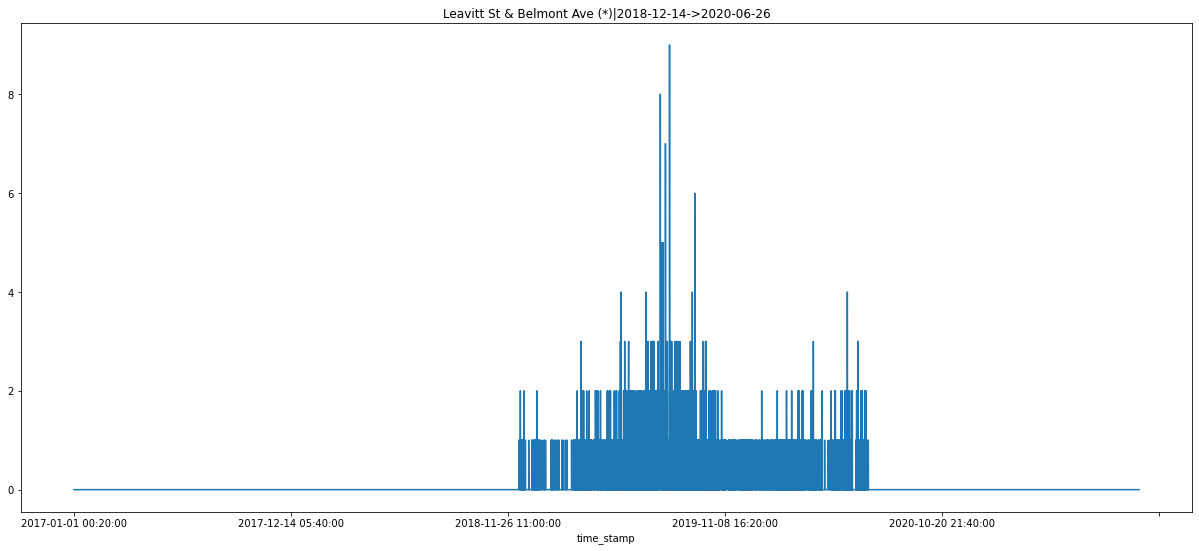

 90%|█████████ | 9/10 [00:01<00:00,  6.18it/s]

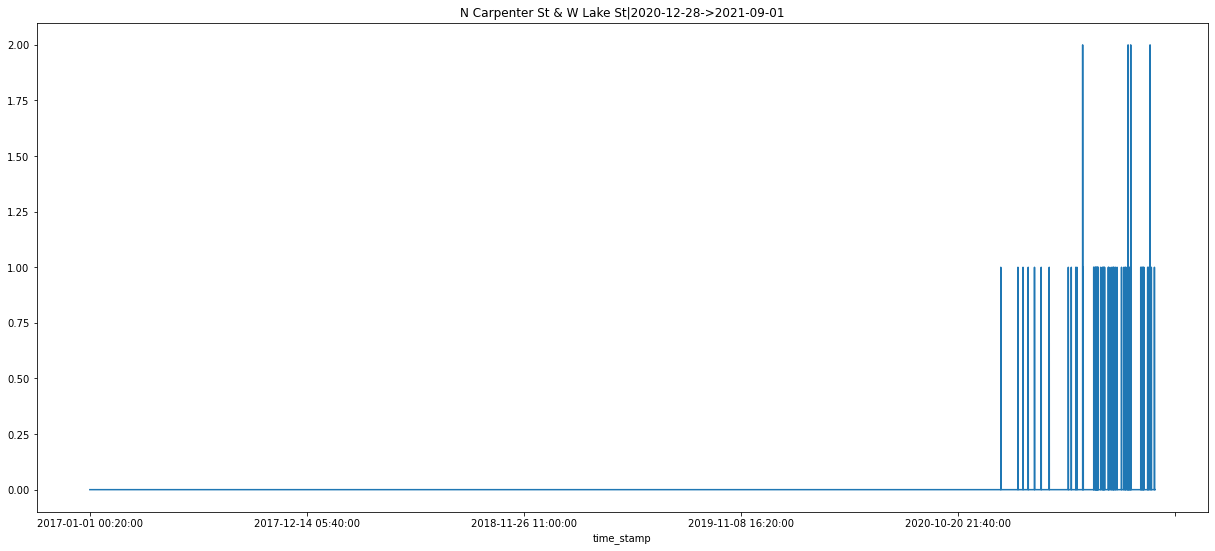

100%|██████████| 10/10 [00:01<00:00,  5.77it/s]


In [217]:
import random
for station_name in tqdm.tqdm(random.choices(df_ts_in_1721.columns,k=10)):
    df_ts_in_1721[station_name].plot(figsize=(21,9))
    temp = df_station_1721_noID_clean[df_station_1721_noID_clean['station_name']==station_name]
    plt.title(f"{station_name}|{str(temp['date_begin'].values[0])}->{str(temp['date_end'].values[0])}")
    plt.show()

# Final Modification 

In [242]:
df_station_1721_temp.date_end.value_counts().sort_index().tail(20)

2021-06-04     1
2021-07-08     1
2021-07-14     1
2021-07-22    12
2021-07-29     3
2021-08-01     2
2021-08-05     1
2021-08-09     2
2021-08-10     1
2021-08-13     1
2021-08-17     1
2021-08-19     2
2021-08-21     2
2021-08-23     4
2021-08-24     3
2021-08-25     3
2021-08-26     4
2021-08-27    14
2021-08-28     9
2021-08-29    16
Name: date_end, dtype: int64

In [224]:
df_station_final = df_station_1721_noID_clean.copy()

In [241]:
df_station_final.date_end = df_station_1721_noID_clean.date_end.replace({'2021-09-01':None,'2021-09-02':None,
                                       '2021-08-31':None,'2021-08-30':None,
                                       '2021-08-29':None,'2021-08-28':None,
                                       '2021-08-27':None})

In [246]:
df_station_final.date_end.value_counts().sort_index().tail(20)

2021-03-01    1
2021-03-15    1
2021-05-27    2
2021-06-04    1
2021-07-08    1
2021-07-14    1
2021-07-22    6
2021-07-29    2
2021-08-01    1
2021-08-05    1
2021-08-09    1
2021-08-10    1
2021-08-13    1
2021-08-17    1
2021-08-19    1
2021-08-21    2
2021-08-23    4
2021-08-24    3
2021-08-25    3
2021-08-26    3
Name: date_end, dtype: int64

In [244]:
df_station_final.isna().sum()

Docks in Service     20
Nbh_id               20
com_id               20
date_begin          481
date_end            713
lat                  20
lng                  20
station_name          0
dtype: int64

In [249]:
df_station_final.date_begin.value_counts().sort_index().head(20)

2017-01-20    3
2017-01-21    9
2017-01-22    1
2017-01-23    2
2017-01-24    1
2017-01-25    1
2017-01-26    1
2017-01-27    1
2017-01-28    2
2017-01-30    1
2017-02-01    2
2017-02-08    1
2017-02-17    3
2017-02-19    2
2017-02-21    1
2017-02-27    1
2017-03-01    1
2017-03-02    1
2017-03-03    1
2017-03-05    1
Name: date_begin, dtype: int64

In [248]:
df_station_final.date_begin = df_station_1721_noID_clean.date_begin.replace({'2017-01-01':None,'2017-01-02':None,
                                       '2017-01-03':None,'2017-01-04':None,'2017-01-05':None,'2017-01-06':None,'2017-01-07':None,
                                       '2017-01-08':None,'2017-01-09':None,'2017-01-10':None,'2017-01-11':None,
                                       '2017-01-12':None,'2017-01-13':None,'2017-01-14':None,'2017-01-15':None,
                                       '2017-01-16':None,'2017-01-17':None,'2017-01-18':None,'2017-01-19':None})

In [251]:
df_station_final.date_begin.value_counts()

2019-07-01    20
2017-01-21     9
2018-01-01     7
2018-01-02     7
2017-07-01     6
              ..
2018-10-12     1
2018-04-30     1
2018-03-29     1
2021-04-11     1
2017-03-30     1
Name: date_begin, Length: 214, dtype: int64

In [250]:
df_station_final.date_end.value_counts()

2019-07-01    19
2018-01-01     8
2021-07-22     6
2017-07-01     5
2018-01-23     5
              ..
2020-09-21     1
2019-07-06     1
2021-08-13     1
2020-06-26     1
2020-09-23     1
Name: date_end, Length: 77, dtype: int64

In [253]:
df_station_final.to_csv('E:\Data\divvy/df_station_1721_FINAL.csv')